In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import math

In [17]:
#导入文本获取的库
import requests
import json
import time
import random
from newspaper import Article

## 数据准备

In [18]:
news = pd.read_excel("RESSET_NEWSDAILY_EXT_2018_1.xls")

In [19]:
news

,信息发布日期_InfoPubDt,媒体出处名称_MediaNm,信息标题_InfoTitle,股票代码_StkCd,链接地址_URL
0,2018-01-02,证券时报网,多个行业和题材走好 沪指涨近1%创1个月新高,1,http://kuaixun.stcn.com/2018/0102/13874814.shtml
1,2018-01-02,中国证券网,两市新年开门红 机构热议2018年三大投资主线,1,http://stock.cnstock.com/stock/smk_gszbs/20180...
2,2018-01-02,新浪财经,盘和林:科技金融时代 上海会沦为“环杭州城市”吗?,1,http://finance.sina.com.cn/zl/bank/2018-01-02/...
3,2018-01-02,中证网,巨丰投顾:市场普涨收获开门红,1,http://www.cs.com.cn/gppd/201801/t20180102_564...
4,2018-01-03,上海证券报,中国股市新年“开门红”,1,http://paper.cnstock.com/html/2018-01/03/conte...
...,...,...,...,...,...
841,2018-12-25,中国产经新闻,银行年末密集“补血”资本补充将持续推进,1,http://bank.jrj.com.cn/2018/12/25074326797580....
842,2018-12-26,深圳证券交易所,★上市公司公告速递_深市(2018-12-26),1,http://reportdocs.static.szse.cn/files/text/gs...
843,2018-12-26,证券时报·e公司,光一科技:控股股东被动减持386万股,1,http://kuaixun.stcn.com/2018/1226/14758751.shtml
844,2018-12-28,上海证券报,超预期!建行中行率先拿到牌照 理财子公司设立加快落地,1,http://paper.cnstock.com/html/2018-12/28/conte...


In [20]:
#爬取单条新闻数据
def get_news(url):
    news = Article(url, language="zh")
    news.download()
    try:
        news.parse()
    except Exception:
        pass
    return news

In [30]:
#获取全部新闻，并将其内容保存到texts中
urls = list(news["链接地址_URL"])
texts = []
for i in range(len(urls)):
    url = urls[i]
    # 利用newspaper访问新闻页面
    try:
        news = get_news(url)
    except Exception:
        try:
            news = get_news(url)
        except Exception:
            texts.append(np.nan)
            continue
    texts.append(news.text)
    print(i, news.title)

0 网页无法访问
1 沪深两市新年开门红 机构热议2018年三大投资主线-市场-上海证券报·中国证券网
2 盘和林：科技金融时代 上海会沦为“环杭州城市”吗？
3 巨丰投顾:市场普涨收获开门红
4 上海证券报电子版 中国证券网
5 巨丰早评：市场有望逐步转强
6 网页无法访问
7 网页无法访问
8 上海证券报电子版 中国证券网
9 
10 
11 板块轮番唱多沪指再冲3400点 氛围回暖超百亿资金涌入91股
12 房企销售排名新特征：明星民企扩大优势
13 上海证券报电子版 中国证券网
14 网页无法访问
15 网页无法访问
16 新年首周北上资金反超南下资金46亿元
17 
18 美锦能源高溢价输血大股东 盈利前景并不乐观
19 
20 
21 网页无法访问
22 银行板块走强 兴业银行涨逾4%-市场-上海证券报·中国证券网
23 道达投资手记：沪指练成“九阳神功”
24 
25 
26 网页无法访问
27 老人买理财产品两个月亏20万 法院判银行担责8成
28 沪指再现“九阳神功” 市场憧憬十连阳今将揭晓-新华网
29 
30 新华社《经济参考报》官方网站
31 新华社《经济参考报》官方网站
32 破解资本“饥渴”17家银行扎堆A股IPO
33 上海证券报电子版 中国证券网
34 网页无法访问
35 网页无法访问
36 大盘宽幅震荡释放调整压力 配置上重价值轻主题
37 网页无法访问
38 网页无法访问
39 网页无法访问
40 大盘再现冰火两重天 保险银行力挺两市-股票频道-和讯网
41 
42 三大利空导致市场下跌 耐心等待回调企稳
43 
44 沪指十一连阳后终迎调整 蓝筹为主行情短期难改变
45 谁在砸盘连阳：顺丰控股负贡献居首，新能源车概念组团打压_牛市点线面_澎湃新闻-The Paper
46 上海证券报电子版 中国证券网
47 网页无法访问
48 网页无法访问
49 
50 上海证券报电子版 中国证券网
51 网页无法访问
52 网页无法访问
53 
54 404-页面不存在
55 基金继续增持绩优蓝筹股 减仓TMT和新能源-中国基金报多媒体数字报
56 
57 上海证券报电子版 中国证券网
58 “大象”起舞 7只银行股创新高
59 
60 入不敷出 社区银行“褪色”
61 ST保千里变身A股“绞肉机” 16个跌停“闷杀”5家定增机构
62 上海

D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 264 bytes but only got 130. Skipping tag 37510
  warnings.warn(
D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41486
  warnings.warn(
D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  warnings.warn(
D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 13 bytes but only got 0. Skipping tag 42033
  warnings.warn(
D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 42034
  warnings.warn(
D:\P

172 信用卡违约金加码 有银行试水信用卡违约金阶梯收费
173 
174 杭州房贷利率继续上涨，个别支行二套房贷款利率上浮30%_地产界_澎湃新闻-The Paper
175 10日起发售2018年两期储蓄国债
176 长盛基金规模不及资历醒目 基金经理更换收益率滑落
177 
178 
179 商业银行因乱收费屡吃罚单:今年4家银行被指质价不符
180 平安银行高管亮相2017年业绩发布会 3月15日全景・路演天下全程直播
181 页面没有找到
182 
183 上海证券报电子版 中国证券网
185 14日晚间影响A股走势的财经要闻
186 
187 
188 A股情报：中小板将继续反弹 21股将爆发(名单)
189 
190 平安银行2017业绩新闻发布会今举办 员工《转型》快闪表演令人耳目一新
191 [直播]平安银行项有志：2017年整体经营稳健发展
192 [直播]平安银行：已将区块链技术落地应用 保证资产及数据安全
193 [直播]平安银行董事长：拥抱寿险取得了实实在在的成绩
194 404-页面不存在
195 [直播]华泰证券沈娟：零售业务已成平安银行盈利核心驱动力
196 上海证券报电子版 中国证券网
197 平安银行断臂疗伤:对公贷款减790亿 消费金融能否补位
198 网页无法访问
199 整治银行业市场乱象 异地银行非持牌机构撤离上海
200 证监会：继续深入开展IPO企业现场检查
201 银行资本补充临近 二级资本工具创新利好中小银行
202 上海证券报电子版 中国证券网
203 亿元罚单背后的支付清算乱象 将何去何从
204 周末影响一周市场的10大消息(点评+新股)
205 险资新进和增持11只中小创股-中国基金报多媒体数字报
206 央行对两家支付清算违规银行开出“罚单”
207 基金公司提前布局A股“入摩”机遇
208 开盘：沪指低开跌0.15% 独角兽概念股强势领涨
209 中国石油等10家千亿市值公司本周发年报 业绩最高增2倍
210 网页无法访问
211 屋顶上的狂欢
212 
213 上海证券报电子版 中国证券网
214 上海证券报电子版 中国证券网
215 
216 农行关闭快捷支付通道 基金P2P充值代扣关停
217 上海证券报电子版 中国证券网
218 近一年没发新基金 独宠金融股让方正富邦逢凶化吉
219 平安银行董

581 上海证券报电子版 中国证券网
582 三六零中报:15亿净利润配1800亿市值 最好时光不在?
583 主力资金净流出125.84亿元 耐心待转机
584 四大行上半年减员3.2万人 中信等4银行人均薪资下滑
585 
586 上海证券报电子版 中国证券网
587 银行房产行业贷余额突破4.8万亿 但占总贷款比重下降
588 整治租房市场乱象，应从创造“新中介”入手
589 姜兆华：房租涨与租金贷有啥关系？
590 被抢头彩微贷网执意赴美上市 传言中300亿估值 悬！
591 上海证券报电子版 中国证券网
592 网页无法访问
593 追踪主力持仓路线图：国家队爱白马 险资减持中小创
594 平安银行APP下架“房租贷”，真正申请到的客户并不多_金改实验室_澎湃新闻-The Paper
595 浦发银行前半年诸事不遂 利润增速垫底
596 上海证券报电子版 中国证券网
597 场内资金抱团取暖 三类股成弱市避风港(附股)
598 平安银行北京分行与中招联合共同发布全新招标通产品
599 民生银行一级资本充足率垫底 减少房贷投放或不得已
600 网页无法访问
601 
602 上海证券报电子版 中国证券网
603 高股息策略进入买入区间 红利指数基金投资价值显现
604 缺乏监管 长租公寓金融化产品是非难断
605 银保监会8月418张罚单五大行占11% 严查房地产类贷款
606 零售业务转型 银行发力信用卡
607 多家上市银行个人消费贷劲升 光大银行增幅达116%
608 上海证券报电子版 中国证券网
609 上海证券报电子版 中国证券网
610 险资二季度 新进88股增持94股
611 上市银行资本充足率降多升少 存“补血”压力
612 上半年五大行减员3.4万 建行工行秋季又招3万人
613 银行理财几近全线“缩表” 大家把钱都投哪儿了？
614 新华社《经济参考报》官方网站
615 上市银行副行长变动频繁 多位金融高管空降地方
616 四大行罕见集体缺席：为何对资管子公司迟迟按兵不动
617 银保监会8月公布415张罚单 农商行仍为监管重地
618 
619 “联姻”金融科技 大行小行各有所图
620 平安银行强化网点内控合规管理
621 
622 
623 央行联手5家银行开发贸易金融区块链平台
624 普华永道：银行业资产质量仍存不确定性，需加大

#### 为什么出现空白无法读取：1、网页过期，网站没有保存数据；2、网页是报纸的截图；3、网站要付费订阅

In [26]:
news2019 = pd.read_excel("RESSET_NEWSDAILY_EXT_2019_1.xls")
news2020 = pd.read_excel("RESSET_NEWSDAILY_EXT_2020_1.xls")

In [27]:
urls = list(news2019["链接地址_URL"])+list(news2020["链接地址_URL"])

In [197]:
texts = []
for i in range(len(urls)):
    url = urls[i]
    # 利用newspaper访问新闻页面
    try:
        news = get_news(url)
    except Exception:
        try:
            news = get_news(url)
        except Exception:
            texts.append(np.nan)
            continue
    texts.append(news.text)
    print(i, news.title)

0 A股纳入标普道琼斯指数初筛名单揭晓
1 北上资金持续加仓“春季行情”
2 
3 
4 上海证券报电子版 中国证券网
5 上海证券报电子版 中国证券网
6 上海证券报电子版 中国证券网
7 平安银行：2018年净利248亿元 同比增长7%
8 平安银行净利润增幅创三年最高值达7%
9 1月3日晚间重要公告集锦-公告解读-上市公司-上海证券报·中国证券网
10 平安银行2018年净利润增长7%
11 
13 
14 【A股异动丨2018年度净利润升7%至248.18亿元 平安银行涨逾5%】-股票频道-和讯网
15 缘尽安邦业绩打折 成都农商行股权转让倒计时 进展不乐观
16 银行板块走强 张家港行(002839.SZ)领涨
17 
18 上海证券报电子版 中国证券网
19 平安银行2018年 净利润增幅创近三年新高
20 
21 上海证券报电子版 中国证券网
22 断直连工作进入冲刺期 中建交等12家银行已发公告
23 
24 沪指涨超1% 家电、汽车股掀起涨停潮
25 华谊兄弟"债务压顶":22亿债月底到期 年关难渡筹资忙
26 德豪润达包揽广东证监新年前五张警示函 王冬雷领罚
27 巨丰午评：蓝筹题材携手上行 大盘重返强势区-股票频道-和讯网
28 毕马威：银行系科技金融子公司运营模式面临挑战
29 银监系统2018年开出逾3800张罚单
30 
31 外资流入70亿创1个月高位
32 主力资金净流出89.87亿元
33 
34 同业存单发行量不减反增 超180家银行公布新年度计划
35 抄底步伐加速 北上资金看好大消费
36 本周股市三大猜想及应对策略：次新股持续走强？
37 厦门银保监局开出16张罚单，信贷违规成重灾区，大行外资行都在列
38 
39 
40 
41 银行核销不良贷款力度料加大
42 平安银行260亿元可转债发行启动
43 主力资金净流出约百亿元
44 上海证券报电子版 中国证券网
45 
46 双汇发展已购买投资理财52.95亿元 尚未收回25.48亿元-公告解读-上市公司-上海证券报·中国证券网
47 银行股早盘持续活跃 青岛银行涨逾5%
48 银行可转债发行启动 华创证券屈庆：供给对市场冲击相对有限
49 上海证券报电子版 中国证券网
50 
51 北上资金重点扫货对象轮动 新基建公司成为新宠
52 外资买意强 A股吸引力凸显
53 上

389 22股特大单净流入资金超1亿元
390 做多情绪修复 主力资金三主线布局
391 广东首支柜台地方债下周二开售 个人投资者可通过银行营业网点及电子银行渠道认购-债券频道-和讯网
392 陆股通净买入69.46亿元，连续6日净买入
393 北向资金6月以来天天扫货A股：6个交易日净流入244亿元_牛市点线面_澎湃新闻-The Paper
394 上海证券报电子版 中国证券网
395 三度"试水"现金贷 搜狗的流量变现难题
396 方正证券员工违法炒股被罚10万 3个月内买卖12只股票累计成交2500万亏损36万-股票频道-和讯网
397 陆股通净买入12.86亿元 成交活跃股抢先看
398 平安银行受深股通青睐 连续3日净买入
399 上海证券报电子版 中国证券网
400 首期柜台广东地方债将在平安银行开售 最低起投金额仅100元-债券频道-和讯网
401 中行行长刘连舸：中银金融科技公司下午即将在上海揭牌_金改实验室_澎湃新闻-The Paper
402 银行陆续设立金融科技公司
403 控股股东所持公司股份全部遭冻结 天房发展控制权暂未受影响-股票频道-和讯网
404 兴业银行获批筹建理财子公司 23家银行正在申请路上
405 中信证券：预计银行股6月表现仍将优于多数行业
406 电影《八佰》“爽约”，华谊兄弟股价闪了一下腰！
407 上海证券报电子版 中国证券网
408 据称平安壹账通转战纽约最早9月上市 估值80亿美元
409 天房发展(600322.SH)：天房集团已与平安银行郑州分行达成和解 将于月底前解除对公司股票的司法冻结-股票频道-和讯网
410 上海证券报电子版 中国证券网
411 银行一小时卖了一个亿 广东首支柜台地方债开闸受捧
412 平安旗下金融壹账通发布智慧合约平台 直击合约管理痛点-新闻-上海证券报·中国证券网
413 
414 银行板块拉升 平安银行大涨6%
415 同业市场趋稳 银行股与非银股携手大涨
416 - CFi.CN 中财网
417 和信投顾：金融股引领仍须市场整体配合
418 信用卡红利还能吃多久？
419 兴业银行遭沪股通连续5日净卖出
420 北上资金加速流入
421 银行零售转型走“量”比“质”更拼“智”
422 本周股市三大猜想及应对策略：创业板上演“补涨”行情？
423 交易金额同比猛增：信用卡业务成银行

D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 33434
  warnings.warn(
D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 33437
  warnings.warn(
D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 0. Skipping tag 36867
  warnings.warn(
D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 0. Skipping tag 36868
  warnings.warn(
D:\Program Files (x86)\anaconda\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 37380
  warnings.warn(
D:\Progr

476 好新闻，无止境
477 银行指数盘中拉升涨逾1%
478 上海证券报电子版 中国证券网
479 核心资产逻辑持续 银行板块投资价值显著
480 保险、银行两大权重持续走高 银行板块多股走强
481 A股三大指数全线翻红收涨 行业资金独宠这一行业
482 用友网络加码民太安公估，筹财险公司、拿经纪牌照保险野心浮现-股票频道-和讯网
483 中金：净利润增速环比下降 建议增加大行敞口
484 中信证券：银行股仍属投资确定性强的板块之一
485 融资客看好22股 买入占成交超三成
486 景顺投资迈克·绍：大盘蓝筹仍为心头好
487 私人银行业务迎风口 中资行外资行券商上演“三国杀”
488 中银国际：银行半年报业绩料稳健增长 中小行改善持续强于大市
489 上海证券报电子版 中国证券网
490 
491 申万宏源：关注基本面持续改善，看好优秀中小银行
492 中国平安启动智慧生态大会 展出十大科技应用场景
493 科创板分流资金一说不攻自破
494 天房发展负债264亿货币资金不足14亿 对外担保169亿为净资产近4倍-股票频道-和讯网
495 从基金持仓看银行股：2Q19持仓回升，攻守兼备
496 中信建投：下半年银行股投资逻辑和选股思路
497 本周股市三大猜想及应对策略：股指持续震荡走高？
498 
499 平安银行：同意给予中电惠融105亿元综合授信额度
500 电信诈骗趋向精准化：“遍地撒网”变成“重点捕鱼”
501 
502 上海证券报电子版 中国证券网
503 平安银行首席信息官张斌：云是整个技术体系的转型
504 *ST雏鹰退市自救上演生死时速
505 银河证券银行业点评：机构偏好国有大行和优质零售行
506 优质银行龙头“攻守兼备”
507 银行业首张汽车金融牌照落地 平安银行汽车消费金融中心获批开业-新闻-上海证券报·中国证券网
508 中信证券：银行板块中报乐观，配置当时
509 暴风集团旗下P2P也出问题，暴风金融有网贷产品已延迟兑付
510 平安业内首发“数字投行” 金融科技加速投行变革
511 整合集团资源 全链条参与并购交易
512 北上资金减持白马股抄底地雷股反被套
513 银行十万亿"活水"灌注普惠小微企业，助贷平台正重塑银行普惠金融经营机制
514 北上资金本周抢筹股名单
515 中视传媒：使用3亿元购买短期理财产品
516 

859 首批农商行永续债呼之欲出
860 上海证券报电子版 中国证券网
861 中国平安正式启动“1.08财神节” 四大金融场景、百款金融产品一键购入-新闻-上海证券报·中国证券网
862 平安银行的APP减法：“平安薪”整合B端及C端高关联场景
863 "正版"概念股来了！区块链50指数横空出世
864 
865 
866 上海证券报电子版 中国证券网
867 上海证券报电子版 中国证券网
868 题材轮动热点扩散 三主线布局跨年行情
869 
870 ST华仪：约2亿元资金被强行划转
871 
872 银行板块也不乏牛股
873 上海证券报电子版 中国证券网
874 15家银行今年发行永续债近5700亿元
875 浙商银行再出稳股价措施：董监高增持不低于316.64万元_金改实验室_澎湃新闻-The Paper
876 237股股价翻倍，825股涨幅超50%！A股2019年，沪指创下近十年第二好表现
877 
878 平安理财获批筹建
879 上海证券报电子版 中国证券网
880 招商南油：17.67亿股重新上市限售股将于1月8日解禁
881 公告精选：长春高新等业绩大幅预增；创元科技子公司拟在精选层挂牌
882 上海证券报电子版 中国证券网
883 招行市值首破万亿，接近兴业、平安、民生3家之和
884 
885 
886 
887 深化"金融+生态"战略 平安好车主信用卡正式上线
888 北向资金“买不停” A股上行“路未尽”
889 
890 平安银行业绩快报：2019年净利同比增13.6%
891 平安银行资产总额逼近4万亿 不良下行、零售对公贷款六四开-新闻-上海证券报·中国证券网
892 平安银行：2019年实现净利润281.95亿元 同比增长13.6%
893 
894 
895 多家上市银行实现营收净利双增
896 金融业在回暖？2019年增加值占比和增速双双上升
897 A股ETF份额 上周增加逾12亿份
898 
899 交行拟设立金融科技子公司
900 前线要抗疫，后院要保障 智慧办公成为中国平安假期高效运营的大利器
901 中国平安为全国五地一线人员提供超136亿元保险保障
902 北向资金净流入逾180亿元
903 丹东银行两笔股权拍卖，起价2.5亿！第六大股东难偿平安银行借款
904 18家银行去年净利润增速超10%
905 核心资产

1193 证券日报网-机构看好八成以上银行成份股 投资优质银行将获确定性回报
1194 什么信号？又一银行百亿筹建债转股子公司！五大行AIC资产一年增两倍
1195 基金代销已是鸡肋？申请牌照三年，齐鲁银行主动撤回！
1196 中泰证券6月配置观点：分歧加大，优化结构（附十大金股）
1197 银河证券：银行估值处于历史低位，且银行股息率高，配置价值明显
1198 中信证券：银行估值极低表明板块下行空间极为有限，个股推荐招商银行等
1199 证券时报网-证券时报官方网站，创业板指定信息披露平台
1200 证券日报网-银行A股IPO年内踩刹车 “补血”渠道正加速扩宽
1201 银行股获券商力挺
1202 
1203 中信证券: 银行继续让利，短期通过量、价、面三维度加大支持实体经济
1204 平安启动银保改革 三大升级打造新模式
1205 贵州大力推进“信易贷”工作-新闻-上海证券报·中国证券网
1206 小微金融政策出炉，中小银行迎结构性利好
1207 证券日报网-多家直销银行调整服务渠道 数字化转型或为破局关键
1208 基金代销行业马太效应明显
1209 国泰君安：继续看好经济复苏带来银行估值修复机会
1210 银行股全线上涨 常熟银行涨逾5%
1211 银行理财净值化转型进程加快
1212 机构扎堆调研 5G新零售爱施德全年业绩可期
1213 
1214 404,您访问的页面已经不存在!
1215 证券时报电子报实时通过手机APP、网站免费阅读重大财经新闻资讯及上市公司公告
1216 
1217 P2P纷纷“清零” 直销银行类P2P业务同步萎缩
1218 高端制造业，银行也栽了？这家上市公司一年债务逾期7个亿，六家银行卷入其中
1219 上市公司台海核电一年债务逾期超7亿 建行平安等6银行卷入其中
1220 6月狠砸300亿，北向资金刷新两大纪录！A股吃饭行情近了?
1221 12大行行长薪酬曝光：平均214万，招行平安466万，最低只有19万？
1222 平安银行个人贷款服务加速线上化 提供超400亿元资金助力复工复产
1223 平安银行(000001.SZ)：项有志和鞠维萍副行长任职资格获核准-格隆汇
1224 
1225 额度有升有降 银行信用卡业务风控趋严
1226 天风证券：低估值与经济反弹共振，银行股估值上行可期
1227 华泰证券：银行板块估值、仓

1474 证券时报电子报实时通过手机APP、网站免费阅读重大财经新闻资讯及上市公司公告
1475 
1476 银行板块持续拉升 成都银行涨停
1477 金融股早盘全线大涨 成都银行40万手直线封涨停
1478 任职不到4个月 格林基金韩东霞因个人原因离任副总经理
1479 
1480 快讯：午后银行股再度走强 平安银行涨超5%
1481 成都银行、长沙银行涨停，为何估值更低的国有大银行涨幅靠后_金改实验室_澎湃新闻-The Paper
1482 北向资金连续两日大幅净流入 平安银行今日获北向资金净买入9.73亿
1483 
1484 证券时报电子报实时通过手机APP、网站免费阅读重大财经新闻资讯及上市公司公告
1485 券商保险银行领涨，金融股全面爆发：新一轮行情是否已经启动_牛市点线面_澎湃新闻-The Paper
1486 平安银行等37股获北向资金增持额超亿元
1487 波士顿咨询：2020保险业价值创造，中国平安(601318.SH/02318.HK)位居世界第三，中国第一-格隆汇
1488 上海证券报电子版 中国证券网
1489 江苏金融圈沸腾，一天两家银行理财子公司获批开业！全国已有16家，还有5家正筹建
1490 兴业银行今日被北向资金净卖出3.37亿
1491 又一个韭菜联合收割机？柔宇科技到底是“独角兽”还是“大忽悠”
1492 平安银行(000001.SZ):平安理财有限责任公司获准开业-格隆汇
1493 平安银行理财子公司获批开业，胡跃飞任董事长、张东任总经理_金改实验室_澎湃新闻-The Paper
1494 平安理财子公司平安理财获准开业-新闻-上海证券报·中国证券网
1495 平安银行理财子公司获准开业，行长胡跃飞兼任平安理财董事长
1496 
1497 上海证券报电子版 中国证券网
1498 证券时报电子报实时通过手机APP、网站免费阅读重大财经新闻资讯及上市公司公告
1499 平安理财获准开业
1500 年内新高前A股摔了一跤 滞涨电力股强势拉升
1501 
1502 20日公司新闻聚焦：磐京基金8天火速举牌西安旅游 长春高新上半年净利增八成
1503 海康威视等26股获北向资金增持额超5000万元
1504 
1505 两市股指盘中再度回落 北向资金净流出超15亿元
1506 午评：三大股指集体走低，跌幅均超1%，金融酿酒板块跌幅居

1768 早知道：证监会将稳步在全市场推行注册制；蚂蚁集团申购时间为10月29日
1769 
1770 东北证券：银行具有确定性行情 上涨空间较大
1771 银河证券：基本面修复+低估值+资金关注 银行板块有望迎来持续上涨行情
1772 40只股遭北向资金减仓超20%
1773 
1774 
1775 
1776 社保基金三季度重仓股名单（附股）
1777 首份上市银行三季报登场！平安银行单季度净利润增长6% 北水继续买入
1778 平安银行(000001.SZ)半日收跌2.18% 前三季度净利润同比减少5.2%-格隆汇
1779 [公司]平安银行：代理基金业务销售规模1153亿元 同比增长53.3%
1780 [公司]平安银行：预计未来不良率将保持可控水平
1781 
1782 拉卡拉(300773.SZ)拟向平安银行申请不超8000万元综合授信额度-格隆汇
1783 博瑞医药公布三季报 前三季净利增加90.89%
1784 机构三季度调仓换股路线图浮现
1785 安信证券：平安银行资产质量拐点确立 单季盈利显著改善
1786 天风证券：私人银行业务发展潜力大 推荐招行与平安
1787 10月22日机构推荐75只个股
1788 快讯：银行板块早盘异动拉升 平安银行大涨近5%
1789 银行板块拉升 平安银行涨4.78%
1790 
1791 快讯：银行板块午后持续走高 平安银行涨超5%
1792 刚刚，6年10倍的消费大白马跌停，业绩不及预期+高管减持，上亿资金排队出逃！监管层出手，“最热市场”仍火爆，最牛转债换手62倍
1793 沪指收跌1.04%失守3300点 银行板块逆势飘红-市场-上海证券报·中国证券网
1794 
1795 证券日报网-A股上市银行三季报披露大幕拉开 计提拨备力度或左右业绩走势
1796 上海证券报电子版 中国证券网
1797 上海证券报电子版 中国证券网
1798 
1799 证券时报电子报实时通过手机APP、网站免费阅读重大财经新闻资讯及上市公司公告
1800 证券日报网-平安白条卡：京东数科与金融机构“合伙人”的“生态共建”样本
1801 10月25日机构推荐64只个股
1802 6股获融资净买入额超5000万元 中国平安居首
1803 中国经营报数字报刊平台
1804 富士康成立工作组应对立讯精密竞争？回应来了！4000亿科技白马

2039 中银证券：看好银行板块近期表现 建议关注平安银行等
2040 平安银行冠名BLG电子竞技俱乐部
2041 首颗金融界物联网卫星“平安1号”成功发射-新闻-上海证券报·中国证券网
2042 国内首颗金融机构物联网卫星“平安1号”成功发射
2043 数字化时代：品牌如何破圈？
2044 “盛世”长安 基业长青 家族信托知识点与国内行业现状解析
2045 证券日报网-险资年内调研658家A股公司4082次
2046 证券时报电子报实时通过手机APP、网站免费阅读重大财经新闻资讯及上市公司公告
2047 金融科技赋能 券商与第三方平台构筑共赢新生态
2048 
2049 农行拟向农银投资增资100亿元 大行掀增资AIC“接力赛”
2050 证券日报网-2020年资本补充“十八般工具”齐上阵 助力商业银行“补血强身”
2051 中银证券：随着国内经济形势逐步转好 银行板块后续配置意愿有望提升
2052 整合金融市场业务 打造“平安避险”专业品牌 平安银行获评年度“卓越外汇金融服务银行”
2053 28股获北向资金超亿元增持，3股业绩预增
2054 伊利股份等股获北向资金增持额超亿元
2055 深高速(600548.SH)获准注册20亿元超短期融资券-格隆汇
2056 机构加速业务布局 助推金融市场互联互通
2057 
2058 光大证券2021年1月份金股出炉 华锦股份、天齐锂业、航天发展等上榜-证券日报网
2059 上海公示第二批金融科技创新监管试点应用，金融科技中心建设稳步推进


In [208]:
news2019["content"] = texts[:875]
news2020["content"] = texts[875:]

In [88]:
#将“网页无法访问”、“上海证券报电子版 中国证券网”等无效信息删除
for i in range(len(texts)):
    if len(str(texts[i]))<50:
        texts[i] = ''

In [90]:
news["content"] = texts[2:]

In [91]:
news

,信息发布日期_InfoPubDt,媒体出处名称_MediaNm,信息标题_InfoTitle,股票代码_StkCd,链接地址_URL,content
0,2018-01-02,证券时报网,多个行业和题材走好 沪指涨近1%创1个月新高,1,http://kuaixun.stcn.com/2018/0102/13874814.shtml,
1,2018-01-02,中国证券网,两市新年开门红 机构热议2018年三大投资主线,1,http://stock.cnstock.com/stock/smk_gszbs/20180...,中国证券网讯 2018年首个交易日，沪深两市高开，上证综指开盘报3314.03点，上涨0.2...
2,2018-01-02,新浪财经,盘和林:科技金融时代 上海会沦为“环杭州城市”吗?,1,http://finance.sina.com.cn/zl/bank/2018-01-02/...,文/新浪财经意见领袖（微信公众号kopleader）专栏作家 盘和林\n\n上海金融成为杭州...
3,2018-01-02,中证网,巨丰投顾:市场普涨收获开门红,1,http://www.cs.com.cn/gppd/201801/t20180102_564...,【盘面简述】\n\n周二，市场喜迎开门红，沪指创1个月新高，市场呈现放量普涨格局。水泥建材、...
4,2018-01-03,上海证券报,中国股市新年“开门红”,1,http://paper.cnstock.com/html/2018-01/03/conte...,
...,...,...,...,...,...,...
841,2018-12-25,中国产经新闻,银行年末密集“补血”资本补充将持续推进,1,http://bank.jrj.com.cn/2018/12/25074326797580....,评论 2018-12-25 07:43:14 来源： 中国产经新闻 作者： 邵志媛 速看！这...
842,2018-12-26,深圳证券交易所,★上市公司公告速递_深市(2018-12-26),1,http://reportdocs.static.szse.cn/files/text/gs...,
843,2018-12-26,证券时报·e公司,光一科技:控股股东被动减持386万股,1,http://kuaixun.stcn.com/2018/1226/14758751.shtml,
844,2018-12-28,上海证券报,超预期!建行中行率先拿到牌照 理财子公司设立加快落地,1,http://paper.cnstock.com/html/2018-12/28/conte...,


In [205]:
news.rename(columns={'信息发布日期_InfoPubDt':'date', '信息标题_InfoTitle':'title', '链接地址_URL':'url'}, inplace = True)
news2019.rename(columns={'信息发布日期_InfoPubDt':'date', '信息标题_InfoTitle':'title', '链接地址_URL':'url'}, inplace = True)
news2020.rename(columns={'信息发布日期_InfoPubDt':'date', '信息标题_InfoTitle':'title', '链接地址_URL':'url'}, inplace = True)

In [95]:
#将标题和内容合并
news["all"] = news["title"]+news["content"]

In [215]:
news2019["all"] = (news2019["title"]+news2019["content"]).astype(str)
news2020["all"] = (news2020["title"]+news2020["content"]).astype(str)

In [96]:
news["date"] = pd.to_datetime(news["date"],format="%Y%m%d")
 
#将改好格式的date列,设置为df的index
news.set_index('date',drop=True)

,媒体出处名称_MediaNm,title,股票代码_StkCd,url,content,all
date,,,,,,
2018-01-02,证券时报网,多个行业和题材走好 沪指涨近1%创1个月新高,1,http://kuaixun.stcn.com/2018/0102/13874814.shtml,,多个行业和题材走好 沪指涨近1%创1个月新高
2018-01-02,中国证券网,两市新年开门红 机构热议2018年三大投资主线,1,http://stock.cnstock.com/stock/smk_gszbs/20180...,中国证券网讯 2018年首个交易日，沪深两市高开，上证综指开盘报3314.03点，上涨0.2...,两市新年开门红 机构热议2018年三大投资主线中国证券网讯 2018年首个交易日，沪深两市高...
2018-01-02,新浪财经,盘和林:科技金融时代 上海会沦为“环杭州城市”吗?,1,http://finance.sina.com.cn/zl/bank/2018-01-02/...,文/新浪财经意见领袖（微信公众号kopleader）专栏作家 盘和林\n\n上海金融成为杭州...,盘和林:科技金融时代 上海会沦为“环杭州城市”吗?文/新浪财经意见领袖（微信公众号kople...
2018-01-02,中证网,巨丰投顾:市场普涨收获开门红,1,http://www.cs.com.cn/gppd/201801/t20180102_564...,【盘面简述】\n\n周二，市场喜迎开门红，沪指创1个月新高，市场呈现放量普涨格局。水泥建材、...,巨丰投顾:市场普涨收获开门红【盘面简述】\n\n周二，市场喜迎开门红，沪指创1个月新高，市场...
2018-01-03,上海证券报,中国股市新年“开门红”,1,http://paper.cnstock.com/html/2018-01/03/conte...,,中国股市新年“开门红”
...,...,...,...,...,...,...
2018-12-25,中国产经新闻,银行年末密集“补血”资本补充将持续推进,1,http://bank.jrj.com.cn/2018/12/25074326797580....,评论 2018-12-25 07:43:14 来源： 中国产经新闻 作者： 邵志媛 速看！这...,银行年末密集“补血”资本补充将持续推进评论 2018-12-25 07:43:14 来源： ...
2018-12-26,深圳证券交易所,★上市公司公告速递_深市(2018-12-26),1,http://reportdocs.static.szse.cn/files/text/gs...,,★上市公司公告速递_深市(2018-12-26)
2018-12-26,证券时报·e公司,光一科技:控股股东被动减持386万股,1,http://kuaixun.stcn.com/2018/1226/14758751.shtml,,光一科技:控股股东被动减持386万股


In [211]:
news2019["date"] = pd.to_datetime(news2019["date"],format="%Y%m%d")
news2019.set_index('date',drop=True)

news2020["date"] = pd.to_datetime(news2020["date"],format="%Y%m%d")
news2020.set_index('date',drop=True)

,媒体出处名称_MediaNm,title,股票代码_StkCd,url,contents,content,all
date,,,,,,,
2020-01-01,澎湃新闻,浙商银行再出稳股价措施:董监高增持不低于316.64万元,1,http://www.thepaper.cn/newsDetail_forward_5396047,(本文来自澎湃新闻，更多原创资讯请下载“澎湃新闻”APP)\n\n此前宣布触发股价稳定机制的...,(本文来自澎湃新闻，更多原创资讯请下载“澎湃新闻”APP)\n\n此前宣布触发股价稳定机制的...,浙商银行再出稳股价措施:董监高增持不低于316.64万元(本文来自澎湃新闻，更多原创资讯请下...
2020-01-02,券商中国,237股股价翻倍 825股涨幅超50%!A股2019年 沪指创下近十年第二好表现,1,http://stock.jrj.com.cn/2020/01/02012228614442...,评论 2020-01-02 01:22:40 来源： 券商中国 作者： 许孝如 速看！这个方...,评论 2020-01-02 01:22:40 来源： 券商中国 作者： 许孝如 速看！这个方...,237股股价翻倍 825股涨幅超50%!A股2019年 沪指创下近十年第二好表现评论 202...
2020-01-02,证券时报,展望2020:核心资产仍具吸引力,1,http://epaper.stcn.com/paper/zqsb/html/epaper/...,,,展望2020:核心资产仍具吸引力
2020-01-02,中国证券报,理财规模超过6000亿元 平安理财获批筹建,1,http://epaper.cs.com.cn/zgzqb/html/2020-01/02/...,全品类开放式理财平台\n\n2019年12月31日，平安银行公告称，该行此前收到中国银保监会...,全品类开放式理财平台\n\n2019年12月31日，平安银行公告称，该行此前收到中国银保监会...,理财规模超过6000亿元 平安理财获批筹建全品类开放式理财平台\n\n2019年12月31日...
2020-01-02,上海证券报,核心资产迅猛崛起 价值投资渐成主流,1,http://paper.cnstock.com/html/2020-01/02/conte...,,,核心资产迅猛崛起 价值投资渐成主流
...,...,...,...,...,...,...,...
2020-12-30,格隆汇,深高速(600548.SH)获准注册20亿元超短期融资券,1,http://www.gelonghui.com/news/462759,格隆汇12月30日丨深高速(600548.SH)公布，公司2019年度股东年会批准了《关于向...,格隆汇12月30日丨深高速(600548.SH)公布，公司2019年度股东年会批准了《关于向...,深高速(600548.SH)获准注册20亿元超短期融资券格隆汇12月30日丨深高速(6005...
2020-12-31,经济参考报,机构加速业务布局 助推金融市场互联互通,1,http://dz.jjckb.cn/www/pages/webpage2009/html/...,金融市场双向开放提速。伴随着多项政策落地，金融机构加速布局业务，助推市场互联互通。在沪深市场...,金融市场双向开放提速。伴随着多项政策落地，金融机构加速布局业务，助推市场互联互通。在沪深市场...,机构加速业务布局 助推金融市场互联互通金融市场双向开放提速。伴随着多项政策落地，金融机构加速...
2020-12-31,深圳证券交易所,★上市公司公告速递_深市(2020-12-31),1,http://reportdocs.static.szse.cn/files/text/gs...,,,★上市公司公告速递_深市(2020-12-31)


In [119]:
#将每一天的新闻进行聚合
df = news.resample(rule= 'D', on='date').agg({ 'all':'sum'}).fillna("")

In [216]:
df2019 = news2019.resample(rule= 'D', on='date').agg({ 'all':'sum'}).fillna("")
df2020 = news2020.resample(rule= 'D', on='date').agg({ 'all':'sum'}).fillna("")

In [217]:
df2019

,all
date,
2019-01-01,A股纳入标普道琼斯指数初筛名单揭晓 这50股权重最高重大揭晓！刚刚宣布1241只A股纳入标普...
2019-01-02,北上资金持续加仓“春季行情”□本报记者 黎旅嘉\n\n在震荡调整背景下，2018年12月，北...
2019-01-03,题材股发力不敌权重股补跌 市场静待绩优股窗口期异地非持牌机构整改“大限”敲定 银行谋求牌照倒...
2019-01-04,平安银行2018年净利润增长7%□本报记者 张晓琪\n\n平安银行1月3日晚披露业绩快报，2...
2019-01-05,大盘绝地反攻 券商股带动沪指重返2500点上方平安银行2018年净利润增幅创近三年新高□本报...
...,...
2019-12-27,题材轮动热点扩散 三主线布局跨年行情大金融引领反弹\n\n昨日，两市震荡反弹，上证指数上涨0...
2019-12-28,北上资金全貌图:遇3000点当先锋 逢整数关则买龙头
2019-12-29,0


In [135]:
#保存新闻文件
df.to_csv("newscontent2018.csv")

In [218]:
df2019.to_csv("newscontent2019.csv")
df2020.to_csv("newscontent2020.csv")

## 文本预处理

In [12]:
import jieba
import string
#from cuml.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("newscontent2018.csv")
df2019 = pd.read_csv("newscontent2019.csv")
df2020 = pd.read_csv("newscontent2020.csv")

In [13]:
#整合数据
news_all = pd.concat([df,df2019,df2020])

In [25]:
#导入停用词
f_stop = open("stopwords.txt",encoding='utf-8')
try:
    f_stop_text = f_stop.read()
finally:
    f_stop.close()
f_stop_list=f_stop_text.split('\n')
#自己构建的停用词
stopwords = ["巨丰","新浪","盘面","早评",r'\\n\\n',r"\n\n"]+f_stop_list

In [18]:
#切词
newslist = [jieba.cut(str(i),cut_all = True) for i in news_all["all"]]

In [20]:
#将文本转换为词袋
wl = [" ".join(i) for i in newslist]

Building prefix dict from D:\Program Files (x86)\anaconda\lib\site-packages\jieba\dict.txt ...
Loading model from cache C:\Users\310\AppData\Local\Temp\jieba.cache
Loading model cost 1.685410737991333 seconds.
Prefix dict has been built succesfully.


In [21]:
#去除停用词
def preprocessing(sen):
    sen = sen.split(" ")
    res = ""
    for word in sen:
        if word in stopwords:
            pass
        else:
            res = res+' '+str(word)
    return res

In [22]:
news_pre = [preprocessing(i) for i in wl]

In [24]:
news_pre[:10]

[' 多个 行业 题材 走   沪 指 涨 近  创 月 新高 两 市 新年 开门 开门红   机构 热 议 2018 年 三 投资 主线 中国 证券 证券网 网讯  2018 年 首个 交易 交易日   沪 深 两 市 高 开   上证 上证综指 综指 开盘 报 3314 03 点   上涨 21   深证 成 指 报 11079 64 点   上涨 35   创业 创业板 指 报 1759 02 点   上涨 36   10 14  上证 上证指数 指数 报 3332 11 点   上涨 24 94 点   涨 75   成交 成交额 709 85 亿   深证 成 指 报 11087 46 点   上涨 47 01 点   涨 43   成交 成交额 692 亿   两 市 合计 计成 成交 成交额 1402 45 亿   创业 创业板 指 报 1752 59 点   下跌 06 点   跌   成交 成交额 148 07 亿  \n\n 面上   行业 板块 涨跌 不一   中房 房地 房地产 地产   银行   建筑 建筑材料 材料 板块 领 涨   非 银 金融   食品 食品饮料 饮料   商业 商业贸易 贸易 板块 领 跌   两 市 个股 涨跌 不一   共计 1607 个股 上涨  1464 个股 下跌  \n\n 市场 人士 认为   大盘 短期 短期内 期内 处于 持续 筑 底 过程 中   资金 回流 预期 提升   后市 有望 缓步 震荡 反弹 为主   建议 投资 投资者 关注 低估 估值 蓝筹 优质 质成 成长 股  \n\n  最新 新市 市况  \n\n 银行 行板 板块 表现 抢眼   平安 银行 涨 逾 \n\n2 早 盘   银行 行板 板块 表现 抢眼   发稿   平安 银行 涨 逾   宁波 银行   招商 招商银行 商银 银行   建设 建设银行 银行   工商 工商银行 商银 银行   农业 农业银行 银行   中国 中国银行 银行 涨 超   杭州 银行   民生 民生银行 生银 银行   交通 交通银行 银行 个股 涨 逾  \n\n 地产 地产股 快速 走强   金地 集团 涨停 \n\n2 早 盘   地产 地产股 快速 走强   发稿   金地 集团 涨停   泰 禾 集团   阳光 阳光城   保利 地

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
from sklearn.decomposition import PCA

In [27]:
#将清洗后的文本转为向量形式
tf = TfidfVectorizer()
data = tf.fit_transform(news_pre)

In [34]:
#进行PCA降维和特征选择，选择保留90%以上的信息
pca = PCA(n_components=0.9)
news_all = pca.fit_transform(data.toarray())

In [36]:
news_all.shape

(1093, 510)

In [308]:
#保存新闻特征数据
np.save("newsall.npy",news_all)

## 股票数据处理

In [408]:
#导入股票数据
import tushare as ts
ts.set_token('3635dd5ae91103099728347cba5ac806ac380e5c7de1726c0f109d4b')

pro = ts.pro_api()
stock2018 = pro.daily(ts_code='000001.SZ', start_date='20180101', end_date='20181231')

In [409]:
#将股票价格数据补齐
dates = pd.date_range(start="2018-01-02", end="2018-12-29")
stock2018 = stock2018.set_index("trade_date")
stock2018 = stock2018.set_index(pd.to_datetime(stock2018.index))
stock2018 = stock2018.reindex(dates, method='bfill')

In [411]:
stock20 = pro.daily(ts_code='000001.SZ', start_date='20190101', end_date='20201231')

In [412]:
dates = pd.date_range(start="2019-01-01", end="2020-12-31")
stock20 = stock20.set_index("trade_date")
stock20 = stock20.set_index(pd.to_datetime(stock20.index))
stock20 = stock20.reindex(dates, method='bfill')

In [417]:
#合并数据
stock = pd.concat([stock2018,stock20])
stock

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
2018-01-02,000001.SZ,13.35,13.93,13.32,13.70,13.30,0.40,3.0100,2081592.55,2856543.822
2018-01-03,000001.SZ,13.73,13.86,13.20,13.33,13.70,-0.37,-2.7000,2962498.38,4006220.766
2018-01-04,000001.SZ,13.32,13.37,13.13,13.25,13.33,-0.08,-0.6000,1854509.48,2454543.516
2018-01-05,000001.SZ,13.21,13.35,13.15,13.30,13.25,0.05,0.3800,1210312.72,1603289.517
2018-01-06,000001.SZ,13.21,13.35,13.15,13.30,13.25,0.05,0.3800,1210312.72,1603289.517
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,000001.SZ,18.26,18.26,17.80,18.04,18.26,-0.22,-1.2048,577077.33,1038128.197
2020-12-28,000001.SZ,18.02,18.86,17.96,18.85,18.04,0.81,4.4900,1270337.06,2352947.321
2020-12-29,000001.SZ,18.87,19.30,18.70,19.17,18.85,0.32,1.6976,963092.23,1837947.238
2020-12-30,000001.SZ,19.00,19.20,18.72,19.20,19.17,0.03,0.1565,978497.78,1854082.812


In [429]:
#构造股价指标
st = pd.DataFrame()
st["date"] = stock.index

In [439]:
#构造股价指标
st['MA_5MA'] = list(stock['close'].rolling(window=5).mean()) #五日平均
st["highlow"] = list(stock['high'].shift(1)/stock['low'].shift(1)) #股价波动
st["volpct"] = list((stock['vol'].shift(1)/stock['vol'].shift(2))-1)#交易量波动
st["high"] = list(stock['high'].shift(1)/stock['high'].shift(1).rolling(window=5).max()) #高价趋势
st["low"] = list(stock['low'].shift(1)/stock['low'].shift(1).rolling(window=5).max()) #低价趋势

In [440]:
#构造涨跌指标
st["y"] = list(np.log(stock['close']/stock['open'])>=0)

In [441]:
st

,date,MA_5MA,highlow,volpct,high,low,y
0,2018-01-02,NaN,NaN,NaN,NaN,NaN,True
1,2018-01-03,NaN,1.045796,NaN,NaN,NaN,False
2,2018-01-04,NaN,1.050000,0.423188,NaN,NaN,False
3,2018-01-05,NaN,1.018279,-0.374005,NaN,NaN,True
4,2018-01-06,13.376,1.015209,-0.347368,NaN,NaN,True
...,...,...,...,...,...,...,...
1088,2020-12-27,18.076,1.025843,0.000000,0.979088,0.986150,False
1089,2020-12-28,18.246,1.025843,0.000000,0.987561,0.986150,True
1090,2020-12-29,18.428,1.050111,1.201329,1.000000,0.995014,True
1091,2020-12-30,18.660,1.032086,-0.241861,1.000000,1.000000,True


In [479]:
st.to_csv("st.csv")

## 多核SVM

In [1]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline

In [4]:
#读取保存的特征数据
news_all = np.load("newsall.npy")
st = pd.read_csv("st.csv")

In [5]:
st.drop("Unnamed: 0",1,inplace=True)

In [6]:
#将日期设为标签
#news_all["date"] = pd.to_datetime(news_all["date"],format="%Y%m%d")
#news_all.set_index('date',drop=True)

#st["date"] = pd.to_datetime(st["date"],format="%Y%m%d")
st.set_index('date',drop=True)

,MA_5MA,highlow,volpct,high,low,y
date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,True
2018-01-03,NaN,1.045796,NaN,NaN,NaN,False
2018-01-04,NaN,1.050000,0.423188,NaN,NaN,False
2018-01-05,NaN,1.018279,-0.374005,NaN,NaN,True
2018-01-06,13.376,1.015209,-0.347368,NaN,NaN,True
...,...,...,...,...,...,...
2020-12-27,18.076,1.025843,0.000000,0.979088,0.986150,False
2020-12-28,18.246,1.025843,0.000000,0.987561,0.986150,True
2020-12-29,18.428,1.050111,1.201329,1.000000,0.995014,True


In [7]:
#将true、false转为1、0
st["y"] = st["y"].astype(int)

In [8]:
#统计涨跌天数
Counter(st["y"])

Counter({1: 553, 0: 540})

In [9]:
#划分训练集、测试集
news_train = news_all[4:726,:]
news_test = news_all[726:-1,:]
stock_train = np.array(st.iloc[5:,1:6].loc[st['date'] <= '2019-12-31'].fillna(0))
stock_test = np.array(st.iloc[:,1:6].loc[st['date'] > '2019-12-31'].fillna(0))
y_train = np.array(st.iloc[5:,6].loc[st['date'] <= '2019-12-31'].fillna(0))
y_test = np.array(st.iloc[:,6].loc[st['date'] > '2019-12-31'].fillna(0))

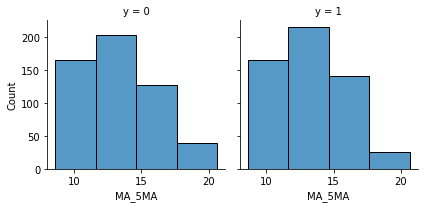

In [10]:
import seaborn as sns
#画图进行数据探索
sns.displot(
    st, x="MA_5MA", col="y",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

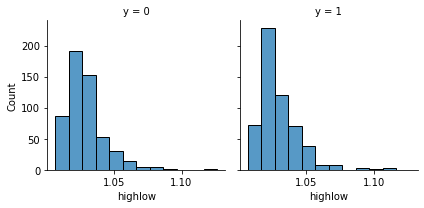

In [11]:
sns.displot(
    st, x="highlow", col="y",
    binwidth=0.01, height=3, facet_kws=dict(margin_titles=True),
)

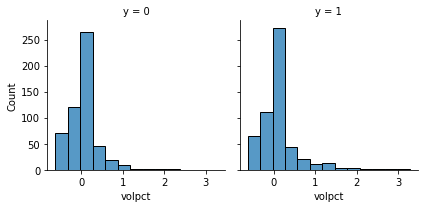

In [256]:
sns.displot(
    st, x="volpct", col="y",
    binwidth=0.3, height=3, facet_kws=dict(margin_titles=True),
)

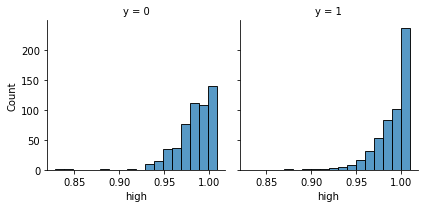

In [259]:
sns.displot(
    st, x="high", col="y",
    binwidth=0.01, height=3, facet_kws=dict(margin_titles=True),
)

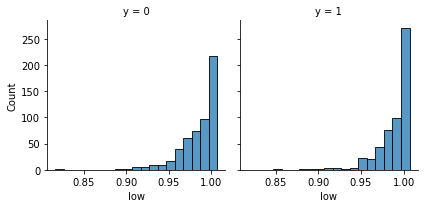

In [260]:
sns.displot(
    st, x="low", col="y",
    binwidth=0.01, height=3, facet_kws=dict(margin_titles=True),
)

从上述图中可以看出这五项技术指标在涨跌中的分布差距不大，区分能力不强

#### 高斯核

In [24]:
#生成核，利用EasyMKL寻找最佳组合
from sklearn.metrics.pairwise import rbf_kernel
from MKLpy.algorithms import EasyMKL
#分别生成训练集核
KLtr1 = rbf_kernel(news_train, gamma=.2)
KLtr2 = rbf_kernel(stock_train, gamma=.2)
KLtr = [KLtr1,KLtr2]
#分别生成测试集核
KLte1 = rbf_kernel(news_test,news_train, gamma=.2)
KLte2 = rbf_kernel(stock_test,stock_train, gamma=.2)
KLte = [KLte1,KLte2]

In [25]:
#寻找最优核组合
mkl = EasyMKL(lam=1.)
mkl = mkl.fit(KLtr, y_train)
#预测
y_pred  = mkl.predict(KLte)            #predict the output class
y_score = mkl.decision_function(KLte)
#评分
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_score)
print ('Accuracy score: %.4f, roc AUC score: %.4f' % (accuracy, roc_auc))
print(classification_report(y_test, y_pred))

Accuracy score: 0.5246, roc AUC score: 0.5166
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       183
           1       0.53      0.49      0.51       183

    accuracy                           0.52       366
   macro avg       0.52      0.52      0.52       366
weighted avg       0.52      0.52      0.52       366



#### 线性核

In [21]:
from sklearn.metrics.pairwise import linear_kernel

KLtr1 = linear_kernel(news_train)
KLtr2 = linear_kernel(stock_train)
KLtr = [KLtr1,KLtr2]

KLte1 = linear_kernel(news_test,news_train)
KLte2 = linear_kernel(stock_test,stock_train)
KLte = [KLte1,KLte2]

In [22]:
#寻找最优核组合
mkl = EasyMKL(lam=1.)
mkl = mkl.fit(KLtr, y_train)
#预测
y_pred  = mkl.predict(KLte)            #predict the output class
y_score = mkl.decision_function(KLte)
#评分
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_score)
print ('Accuracy score: %.4f, roc AUC score: %.4f' % (accuracy, roc_auc))
print(classification_report(y_test, y_pred))

Accuracy score: 0.5027, roc AUC score: 0.5281
              precision    recall  f1-score   support

           0       0.50      0.69      0.58       183
           1       0.50      0.32      0.39       183

    accuracy                           0.50       366
   macro avg       0.50      0.50      0.48       366
weighted avg       0.50      0.50      0.48       366



#### 多项式核

In [26]:
from sklearn.metrics.pairwise import polynomial_kernel as poly_kernel

KLtr1 = poly_kernel(news_train,gamma=.2,degree=3)
KLtr2 = poly_kernel(stock_train,gamma=.25,degree=3)
KLtr = [KLtr1,KLtr2]

KLte1 = poly_kernel(news_test,news_train,gamma=.2,degree=3)
KLte2 = poly_kernel(stock_test,stock_train,gamma=.25,degree=3)
KLte = [KLte1,KLte2]

In [27]:
#寻找最优核组合
mkl = EasyMKL(lam=1.)
mkl = mkl.fit(KLtr, y_train)
#预测
y_pred  = mkl.predict(KLte)            #predict the output class
y_score = mkl.decision_function(KLte)
#评分
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_score)
print ('Accuracy score: %.4f, roc AUC score: %.4f' % (accuracy, roc_auc))
print(classification_report(y_test, y_pred))

Accuracy score: 0.5437, roc AUC score: 0.5686
              precision    recall  f1-score   support

           0       0.54      0.64      0.58       183
           1       0.55      0.45      0.50       183

    accuracy                           0.54       366
   macro avg       0.55      0.54      0.54       366
weighted avg       0.55      0.54      0.54       366



#### 拉普拉斯核

In [335]:
#拉普拉斯核
from sklearn.metrics.pairwise import laplacian_kernel as lap_kernel

KLtr1 = lap_kernel(news_train,gamma=.1)
KLtr2 = lap_kernel(stock_train,gamma=.1)
KLtr = [KLtr1,KLtr2]

KLte1 = lap_kernel(news_test,news_train,gamma=.1)
KLte2 = lap_kernel(stock_test,stock_train,gamma=.1)
KLte = [KLte1,KLte2]

In [336]:
#寻找最优核组合
mkl = EasyMKL(lam=1.)
mkl = mkl.fit(KLtr, y_train)
#预测
y_pred  = mkl.predict(KLte)            #predict the output class
y_score = mkl.decision_function(KLte)
#评分
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_score)
print ('Accuracy score: %.4f, roc AUC score: %.4f' % (accuracy, roc_auc))
print(classification_report(y_test, y_pred))

Accuracy score: 0.5328, roc AUC score: 0.5317
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       183
           1       0.55      0.38      0.45       183

    accuracy                           0.53       366
   macro avg       0.54      0.53      0.52       366
weighted avg       0.54      0.53      0.52       366



#### sigmod核

In [213]:
#sigmod核
from sklearn.metrics.pairwise import sigmoid_kernel as sig_kernel
KLtr1 = sig_kernel(news_train,gamma=.1)
KLtr2 = sig_kernel(stock_train,gamma=.1)
KLtr = [KLtr1,KLtr2]

KLte1 = sig_kernel(news_test,news_train,gamma=.1)
KLte2 = sig_kernel(stock_test,stock_train,gamma=.1)
KLte = [KLte1,KLte2]

In [214]:
#寻找最优核组合
mkl = EasyMKL(lam=1.)
mkl = mkl.fit(KLtr, y_train)
#预测
y_pred  = mkl.predict(KLte)            #predict the output class
y_score = mkl.decision_function(KLte)
#评分
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_score)
print ('Accuracy score: %.4f, roc AUC score: %.4f' % (accuracy, roc_auc))
print(classification_report(y_test, y_pred))

Accuracy score: 0.5164, roc AUC score: 0.5021
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       183
           1       0.52      0.50      0.51       183

    accuracy                           0.52       366
   macro avg       0.52      0.52      0.52       366
weighted avg       0.52      0.52      0.52       366



#### 多项式核+拉普拉斯核

In [229]:
KLtr1 = poly_kernel(news_train,gamma=.15)
KLtr2 = lap_kernel(stock_train,gamma=.15)
KLtr = [KLtr1,KLtr2]

KLte1 = poly_kernel(news_test,news_train,gamma=.15)
KLte2 = lap_kernel(stock_test,stock_train,gamma=.15)
KLte = [KLte1,KLte2]

In [230]:
#寻找最优核组合
mkl = EasyMKL(lam=1.)
mkl = mkl.fit(KLtr, y_train)
#预测
y_pred  = mkl.predict(KLte)            #predict the output class
y_score = mkl.decision_function(KLte)
#评分
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_score)
print ('Accuracy score: %.4f, roc AUC score: %.4f' % (accuracy, roc_auc))
print(classification_report(y_test, y_pred))

Accuracy score: 0.5410, roc AUC score: 0.5457
              precision    recall  f1-score   support

           0       0.53      0.77      0.62       183
           1       0.57      0.32      0.41       183

    accuracy                           0.54       366
   macro avg       0.55      0.54      0.52       366
weighted avg       0.55      0.54      0.52       366



In [246]:
KLtr1 = lap_kernel(news_train,gamma=.1)
KLtr2 = poly_kernel(stock_train,gamma=.1)
KLtr = [KLtr1,KLtr2]

KLte1 = lap_kernel(news_test,news_train,gamma=.1)
KLte2 = poly_kernel(stock_test,stock_train,gamma=.1)
KLte = [KLte1,KLte2]

In [247]:
#寻找最优核组合
mkl = EasyMKL(lam=1.)
mkl = mkl.fit(KLtr, y_train)
#预测
y_pred  = mkl.predict(KLte)            #predict the output class
y_score = mkl.decision_function(KLte)
#评分
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_score)
print ('Accuracy score: %.4f, roc AUC score: %.4f' % (accuracy, roc_auc))
print(classification_report(y_test, y_pred))

Accuracy score: 0.5683, roc AUC score: 0.5739
              precision    recall  f1-score   support

           0       0.55      0.70      0.62       183
           1       0.59      0.43      0.50       183

    accuracy                           0.57       366
   macro avg       0.57      0.57      0.56       366
weighted avg       0.57      0.57      0.56       366



#### 普通SVM

In [15]:
#使用简单的SVM尝试
X_train = np.hstack((news_train,stock_train))
X_test = np.hstack((news_test,stock_test))

In [297]:
# 实例化SVM
svc = SVC(kernel='poly',C=6)

In [298]:
# 训练线性SVM
svc.fit(X_train, y_train)

SVC(C=6, kernel='poly')

In [299]:
y_fit = svc.predict(X_test)
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       0.54      0.33      0.41       183
           1       0.52      0.72      0.60       183

    accuracy                           0.52       366
   macro avg       0.53      0.52      0.50       366
weighted avg       0.53      0.52      0.50       366

